In [272]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [273]:
# memasukkan dataset ke dalam dataframe dengan pandas
df = pd.read_csv('Life Expectancy Data.csv')

# menampilkan 5 data teratas
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [274]:
# mengambil kolom yang akan digunakan
df_copy = df[['GDP', 'Schooling', 'Life expectancy ', 'Country', 'Status']].copy()

# menampilkan 5 data teratas
df_copy.head()

,GDP,Schooling,Life expectancy,Country,Status
0,584.259210,10.1,65.0,Afghanistan,Developing
1,612.696514,10.0,59.9,Afghanistan,Developing
2,631.744976,9.9,59.9,Afghanistan,Developing
3,669.959000,9.8,59.5,Afghanistan,Developing
4,63.537231,9.5,59.2,Afghanistan,Developing


In [275]:
# menampilkan info dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GDP               2490 non-null   float64
 1   Schooling         2775 non-null   float64
 2   Life expectancy   2928 non-null   float64
 3   Country           2938 non-null   object 
 4   Status            2938 non-null   object 
dtypes: float64(3), object(2)
memory usage: 114.9+ KB


In [276]:
# melihat statistik deskriptif dataset
df_copy.describe()

,GDP,Schooling,Life expectancy
count,2490.000000,2775.000000,2928.000000
mean,7483.158469,11.992793,69.224932
std,14270.169342,3.358920,9.523867
min,1.681350,0.000000,36.300000
25%,463.935626,10.100000,63.100000
50%,1766.947595,12.300000,72.100000
75%,5910.806335,14.300000,75.700000
max,119172.741800,20.700000,89.000000


In [277]:
# melihat data kosong
df_copy.isna().sum()

GDP                 448
Schooling           163
Life expectancy      10
Country               0
Status                0
dtype: int64

In [278]:
# melihat rasio data kosong
df_copy.isna().sum()/len(df_copy)

GDP                 0.152485
Schooling           0.055480
Life expectancy     0.003404
Country             0.000000
Status              0.000000
dtype: float64

In [279]:
# membersihkan nama kolom
df_copy.columns = df_copy.columns.str.strip().str.replace(' ', '_')

# cetak nama kolom dataset
df_copy.columns

Index(['GDP', 'Schooling', 'Life_expectancy', 'Country', 'Status'], dtype='object')

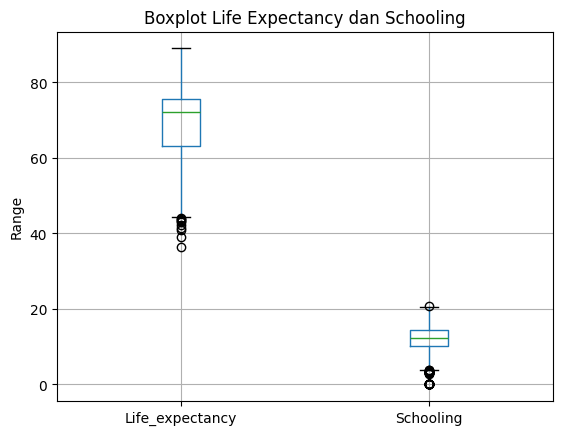

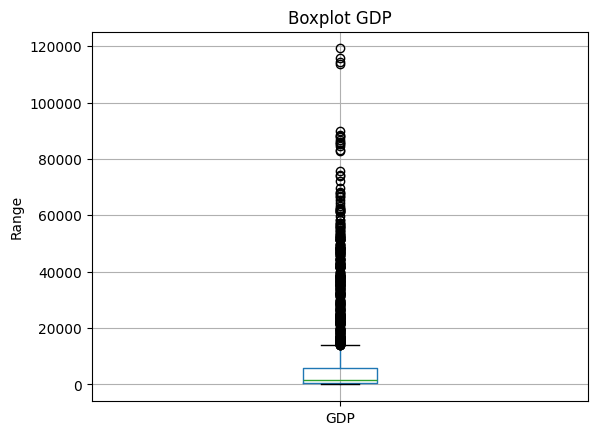

In [280]:
# visualisasi boxplot dataset
# membuat grafik life expectancy dan schooling
df_copy.boxplot(column=['Life_expectancy', 'Schooling'])
plt.title('Boxplot Life Expectancy dan Schooling')
plt.ylabel('Range')
# mencetak hasil grafik
plt.show()

# membuat grafik GDP
df_copy.boxplot(column=['GDP'])
plt.title('Boxplot GDP')
plt.ylabel('Range')
# mencetak hasil grafik
plt.show()

In [281]:
# mengisi nilai kosong kolom GDP berdasarkan Country
df_copy[['GDP', 'Schooling', 'Life_expectancy']] = df_copy.groupby('Country')[['GDP', 'Schooling', 'Life_expectancy']].transform(
    lambda x: x.fillna(x.median())
)

In [282]:
# melihat kembali nilai kosong
df_copy.isna().sum()

GDP                405
Schooling          163
Life_expectancy     10
Country              0
Status               0
dtype: int64

In [283]:
# menghapus semua data kosong
df_copy = df_copy.dropna()

# menampilkan nilai kosong dataset setelah penghapusan data kosong
df_copy.isna().sum()

GDP                0
Schooling          0
Life_expectancy    0
Country            0
Status             0
dtype: int64

In [284]:
# get dummies untuk kolom Status
df_copy = pd.get_dummies(df_copy, columns=['Status'])

# cetak nama kolom dataset
df_copy.columns

Index(['GDP', 'Schooling', 'Life_expectancy', 'Country', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [285]:
# mengubah nilai boolean menjadi binary di kolom Status

df_copy['Status_Developed'] = df_copy['Status_Developed'].astype(int)
df_copy['Status_Developing'] = df_copy['Status_Developing'].astype(int)

df_copy.head()

,GDP,Schooling,Life_expectancy,Country,Status_Developed,Status_Developing
0,584.259210,10.1,65.0,Afghanistan,0,1
1,612.696514,10.0,59.9,Afghanistan,0,1
2,631.744976,9.9,59.9,Afghanistan,0,1
3,669.959000,9.8,59.5,Afghanistan,0,1
4,63.537231,9.5,59.2,Afghanistan,0,1


In [288]:
# membuat regresi OLS
x = df_copy[['GDP', 'Schooling', 'Status_Developed']].to_numpy()
y = df_copy['Life_expectancy'].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y, x).fit()
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:30:53   Log-Likelihood:                -8125.3
No. Observations:                2512   AIC:                         1.626e+04
Df Residuals:                    2508   BIC:                         1.628e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3600      0.493     93.977      0.0